<a href="https://colab.research.google.com/github/wallypaul/Crownmovies/blob/master/Handwritten_recognition_google_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [6]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [0]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

Display some text

In [0]:

def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

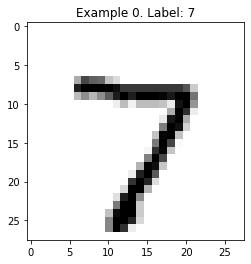

In [10]:

display(0)

Check how many features you have

**Save the whole model for futer use**

In [11]:
print(len(data[0])) 

784


Fit a linear classifier

In [12]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f14dd30ef60>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

**Evaluate acuracy of the clasifier a few examples**
We can make predictions on individual images using the predict method

In [16]:
print (classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


**Clasification of a few example**

In [18]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[5]), test_labels[5]))

InvalidArgumentError: ignored

In [1]:
display(8)


8

**Visualize learned weights**

Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT tutorial.

In [0]:
for var in classifier.get_variable_names():
    print("var:", var, "=", classifier.get_variable_value(var))

var: global_step = 1000
var: linear//weight = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
var: linear//weight/d/linear//weight/part_0/Ftrl = [[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]
var: linear//weight/d/linear//weight/part_0/Ftrl_1 = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
var: linear/bias_weight = [-0.3607028   0.23778489  0.04752287 -0.04832614  0.03290107  1.0220059
 -0.21491428  0.5462882  -0.8576919  -0.19971937]
var: linear/bias_weight/near/bias_weight/part_0/Ftrl = [0.21301702 0.19824342 0.36525887 0.6702957  0.36473382 0.43759418
 0.24948785 0.29092404 0.5292658  0.5635558 ]
var: linear/bias_weight/near/b

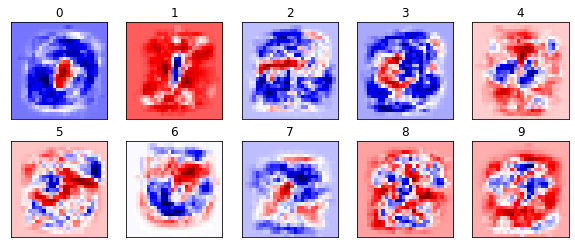

In [0]:
weights = classifier.get_variable_value("linear//weight/d/linear//weight/part_0/Ftrl_1")
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()